In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv("C:/Users/User/OneDrive/Documents/task2.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
data['A']=data[['Annual Income (k$)']]
data['B']=data[['Spending Score (1-100)']]

In [3]:
x=data[['A','B']]
x.head()

,A,B
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

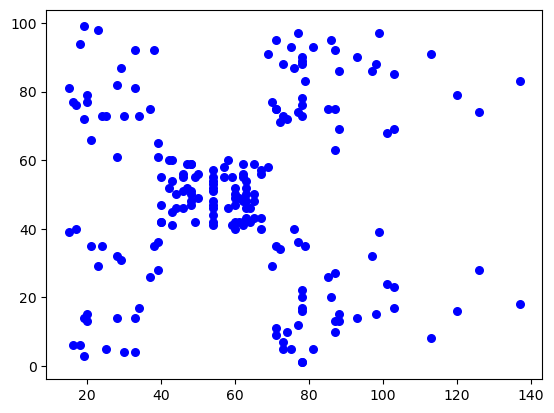

In [5]:
plt.scatter(x['A'],x['B'],s=30,c='b')
plt.show()

In [6]:
import warnings
warnings.filterwarnings('ignore')
Kmean=KMeans(n_clusters=5)
Kmean.fit(x)
centers=Kmean.cluster_centers_
print(Kmean.cluster_centers_)

[[86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


In [7]:
clusters=Kmean.fit_predict(x)
data['label']=clusters
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),A,B,label
0,1,Male,19,15,39,15,39,2
1,2,Male,21,15,81,15,81,4
2,3,Female,20,16,6,16,6,2
3,4,Female,23,16,77,16,77,4
4,5,Female,31,17,40,17,40,2
5,6,Female,22,17,76,17,76,4
6,7,Female,35,18,6,18,6,2
7,8,Female,23,18,94,18,94,4
8,9,Male,64,19,3,19,3,2
9,10,Female,30,19,72,19,72,4


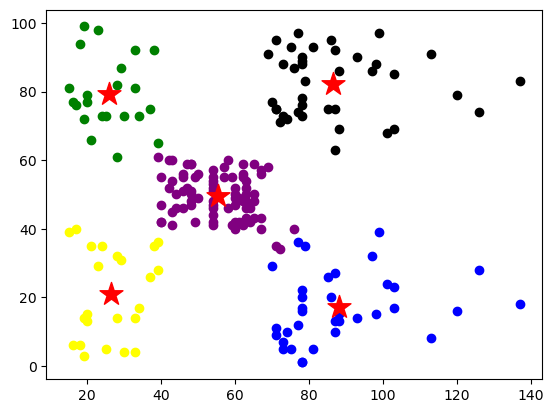

In [8]:
col=['blue','purple','yellow','black','green']
for i in range(5):
    a=col[i]
    plt.scatter(data.A[data.label==i],data.B[data.label==i],c=a,label='Cluster')
plt.scatter(centers[:,0],centers[:,1],marker='*',s=300,c='r',label='Centroid')

In [9]:
y=x.loc[:,['A','B']].values
y

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

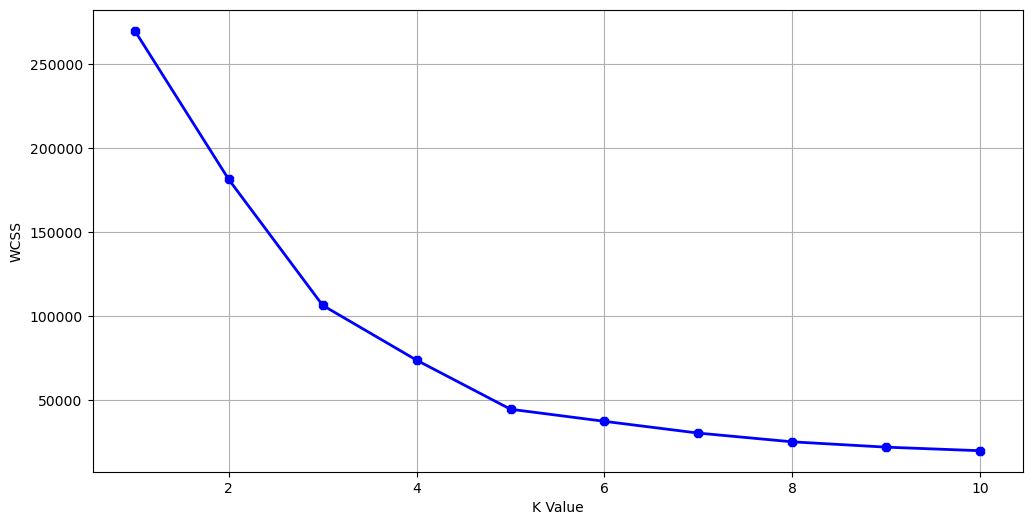

In [10]:
wcss=[]
for j in range(1,11):
    kmeans=KMeans(n_clusters=j,init='k-means++')
    kmeans.fit(y)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='blue',marker='8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()